<a href="https://colab.research.google.com/github/Xifus/SA-lab/blob/master/Sensitivity_Analysis_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install SAlib

     |████████████████████████████████| 860kB 4.8MB/s 
  Created wheel for SAlib: filename=SALib-1.3.8-py2.py3-none-any.whl size=728616 sha256=116bba8629daef15e1bb23054e0825257c0628b1bf371841fc3a4e7ad17e3c24
  Stored in directory: /root/.cache/pip/wheels/be/82/be/c7769493a512ba0863312f12627c1f2fadb4a96e1f24f295ee
Successfully built SAlib


We will work on Python during this Lab.

SALib is an open source library written in Python for performing sensitivity analysis. A typical sensitivity analysis using SALib follows four steps:
1. Determine the model inputs (parameters) and their sample range
2. Run the sample function to generate the model inputs
3. Evaluate the model using the generated inputs, saving the model outputs
4. Run the analyze function on the outputs to compute the sensitivity indices

SALib is the main package that we will play around today. With the help of google colab, the SALib package is already installed and ready to run.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

One of the important things in python is that you have to import the corresponding functions first before you can use them. Numpy provides basic built in functions (random number generator in this case), and Matplotlib provides the ability to show figures.

We import different sampling techniques ***sample***, sensitivity analysis method ***analyze*** and test functions ***test_functions*** from SALib package.

In [0]:
from SALib.sample import latin
from SALib.sample import sobol_sequence
from SALib.sample import morris as morris_samp
from SALib.sample import saltelli

In [0]:
from SALib.analyze import sobol
from SALib.analyze import morris

In [0]:
from SALib.test_functions import Ishigami
from SALib.test_functions import Sobol_G

Scatter plots for Random, Latin Hypercube, and Sobol' sequence. The default sample size (N) is 100. You can change the sample size and observe the scatter plots.  

In [0]:
problem ={'num_vars': 2,
          'names': ['x1', 'x2'],
          'bounds': [[0, 1],
                     [0, 1]]}
N = 100

Random sampling

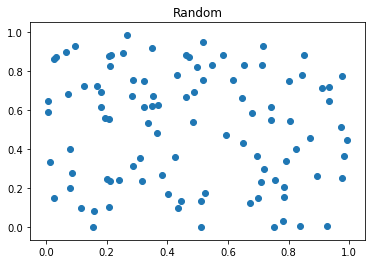

In [13]:
rand_samp = np.random.rand(N, 2)
plt.figure()
plt.scatter(rand_samp[:,0], rand_samp[:, 1])
plt.title('Random')
plt.show()

Latin Hypercube

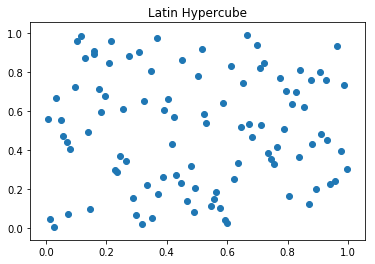

In [14]:
latin_samp = latin.sample(problem, N)
plt.figure()
plt.scatter(latin_samp[:,0], latin_samp[:, 1])
plt.title('Latin Hypercube')
plt.show()

Sobol' sequence

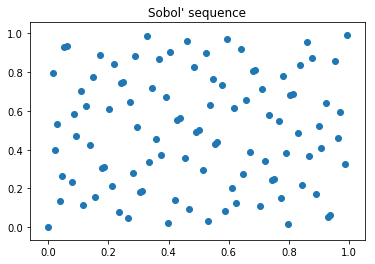

In [15]:
sobol_samp = sobol_sequence.sample(N, 2)
plt.figure()
plt.scatter(sobol_samp[:,0], sobol_samp[:, 1])
plt.title('Sobol\' sequence')
plt.show()

Put all three sampling methods together

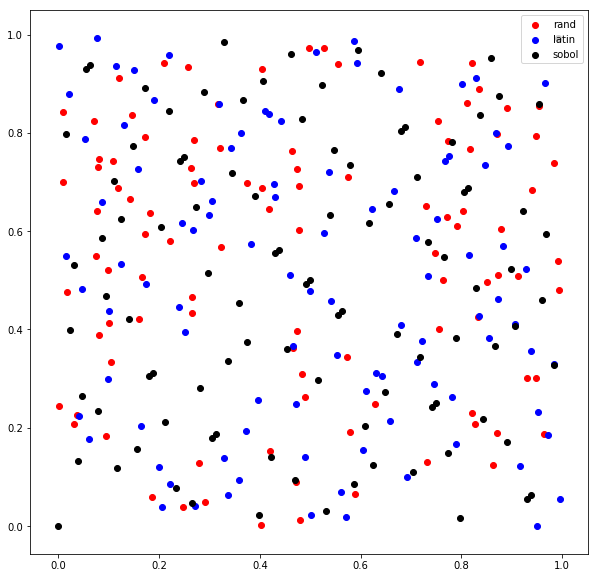

In [12]:
plt.figure(figsize = (10, 10))
plt.scatter(rand_samp[:,0], rand_samp[:, 1], c = 'r', label = 'rand')
plt.scatter(latin_samp[:,0], latin_samp[:, 1], c = 'b', label = 'latin')
plt.scatter(sobol_samp[:,0], sobol_samp[:, 1], c = 'k', label = 'sobol')
plt.legend(loc = 'best')
plt.show()

Next is an example of Monte Carlo on approximating the value of Pi by using different sampling techniques. You can comment (#) or uncomment (remove # at the beginning of the line) to use different sampling techniques. How close can you get? How does the number of samples affect your approximation?

In [16]:
N_sample = 1000
MC_rand = np.random.rand(N_sample, 2)
#MC_latin = latin.sample(problem, N_sample)
#MC_sobol = sobol_sequence.sample(N_sample, 2)
#MC_saltelli = saltelli.sample(problem, N_sample)
count = 0
for i in range(N_sample):
    if MC_rand[i, 0]**2 + MC_rand[i, 1]**2 < 1.0:
        count += 1
pi_approx = count/N_sample * 4
print('real pi = ', np.pi)
print('approximated = ', pi_approx)

real pi =  3.141592653589793
approximated =  3.192


**Sensitivity analysis method in application**

After you defining the model inputs (ex. problem = {'num_vars', 'names', 'bounds'}), the workflow looks like this:


1.   Generate Samples (ex. param values = latin.sample(problem, 1000))
2.   Run the Model (ex. Y = Ishigami.evaluate(param values))
3.   Perform Analysis (ex. Si = sobol.analyze(problem, Y))




First, we use Ishigami Homma functinon 

![](https://raw.githubusercontent.com/Xifus/SA-lab/master/ishigami.PNG)

In [0]:
ishigami_problem ={
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

In [18]:
X_morris = morris_samp.sample(ishigami_problem, 1000, num_levels=4)
Y_morris = Ishigami.evaluate(X_morris)
Si_morris = morris.analyze(ishigami_problem, X_morris, Y_morris, conf_level=0.95, print_to_console=True, num_levels=4)

Parameter                         Mu_Star         Mu    Mu_Star_Conf      Sigma
x1                                  8.054      8.054           0.375      6.242
x2                                  7.875     -0.347           0.000      7.871
x3                                  6.199      0.350           0.392      8.799


**Morris Method: Perform Morris Analysis on model outputs**

---
SALib.analyze.morris.analyze(problem, X, Y, num_resamples = 1000,
conf_level = 0.95, print_to_console = False, num_levels = 4)

---




**Parameters**:

problem (dict) – The problem definition

X (numpy.matrix) – The NumPy matrix containing the model inputs
of dtype=float

X (numpy.matrix) – The NumPy matrix containing the model inputs
of dtype=float

num resamples (int) – The number of resamples used to compute the
confidence intervals (default 1000)

conf level (float) – The confidence interval level (default 0.95)

print to console (bool) – Print results directly to console (default
False)

num levels (int) – The number of grid levels, must be identical to the
value passed to SALib.sample.morris (default 4)

**Returns**:

Si – A dictionary of sensitivity indices containing the following
entries.

mu - the mean elementary effect

mu star - the absolute of the mean elementary effect

sigma - the standard deviation of the elementary effect

mu star conf - the bootstrapped confidence interval

names - the names of the parameters

In [20]:
X_sobol = latin.sample(ishigami_problem, 1000)
Y_sobol = Ishigami.evaluate(X_sobol)
Si_sobol = sobol.analyze(ishigami_problem, Y_sobol, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
x1 -0.244588 0.202962 1.242234 0.357518
x2 -0.104023 0.217810 0.975953 0.290316
x3 -0.131621 0.242004 0.929083 0.201621

Parameter_1 Parameter_2 S2 S2_conf
x1 x2 0.075271 0.350154
x1 x3 0.247637 0.313115
x2 x3 0.004388 0.320745


**Sobol’ Method: Perform Sobol’ Analysis on model outputs**


---

SALib.analyze.sobol.analyze(problem, Y, calc_second_order=True,
num_resamples=100, conf_level=0.95, print_to_console=False)

---



**Parameters**:

problem (dict) – The problem definition

Y (numpy.array) – A NumPy array containing the model outputs

calc second order (bool) – Calculate second-order sensitivities (default True)

num resamples (int) – The number of resamples (default 100)

conf level (float) – The confidence interval level (default 0.95)

print to console (bool) – Print results directly to console (default
False)

**Returns**: 

Si – A dictionary of sensitivity indices containing the following
entries.

S1 - the first order sensitivity

S1 conf - the confidence interval of the first order sensitivity with a
confidence level of 95%

ST - the total effect sensitivity

ST conf - the confidence interval of the total effect sensitivity with a
confidence level of 95%

S2 - the second order sensitivity (if calc second order is True)

S2 conf - the confidence interval of second order sensitivity with a
confidence level of 95% (if calc second order is True)

In [21]:
X_sobol_sal = saltelli.sample(ishigami_problem, 1000)
Y_sobol_sal = Ishigami.evaluate(X_sobol_sal)
Si_sobol_sal = sobol.analyze(ishigami_problem, Y_sobol_sal, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
x1 0.307975 0.063992 0.560137 0.085139
x2 0.447767 0.051933 0.438722 0.037422
x3 -0.004255 0.061305 0.242845 0.028595

Parameter_1 Parameter_2 S2 S2_conf
x1 x2 0.012205 0.079924
x1 x3 0.251526 0.097520
x2 x3 -0.009954 0.067318


Now, we use V-function (Sobol g-function) and try the different methods.

![](https://raw.githubusercontent.com/Xifus/SA-lab/master/sobolG.PNG)

In [0]:
V_problem ={'num_vars': 8,
          'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'],
          'bounds': [[0, 1]]*8}

In [23]:
X_morris_V = morris_samp.sample(V_problem, 999, num_levels=4)
Y_morris_V = Sobol_G.evaluate(X_morris_V)
Si_morris_V = morris.analyze(V_problem, X_morris_V, Y_morris_V, conf_level=0.95, print_to_console=True, num_levels=4)

Parameter                         Mu_Star         Mu    Mu_Star_Conf      Sigma
x1                                  2.604      0.048           0.051      2.730
x2                                  1.482     -0.019           0.048      1.675
x3                                  0.569     -0.029           0.022      0.666
x4                                  0.327      0.006           0.012      0.383
x5                                  0.034      0.000           0.001      0.040
x6                                  0.033     -0.002           0.001      0.039
x7                                  0.034      0.001           0.001      0.040
x8                                  0.034      0.000           0.001      0.040


In [24]:
X_sobol_V = latin.sample(V_problem, 990)
Y_sobol_V = Sobol_G.evaluate(X_sobol_V)
Si_sobol_V = sobol.analyze(V_problem, Y_sobol_V, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
x1 0.488342 0.436833 1.259946 0.442867
x2 -0.082831 0.301988 0.958042 0.350428
x3 0.240094 0.235397 0.573560 0.210312
x4 0.247635 0.339251 0.756788 0.270318
x5 -0.001920 0.310063 1.253777 0.417234
x6 0.229312 0.431314 1.216881 0.432299
x7 0.234515 0.374657 1.222895 0.427712
x8 0.275489 0.310328 0.984541 0.332793

Parameter_1 Parameter_2 S2 S2_conf
x1 x2 -0.005571 0.581942
x1 x3 -0.532664 0.428686
x1 x4 -0.644372 0.631366
x1 x5 -0.096152 0.622156
x1 x6 -0.527393 0.676683
x1 x7 -0.573399 0.458694
x1 x8 -0.646959 0.512960
x2 x3 -0.079631 0.379317
x2 x4 -0.027323 0.429688
x2 x5 0.328006 0.463241
x2 x6 0.151059 0.533072
x2 x7 0.202881 0.471388
x2 x8 -0.042376 0.415392
x3 x4 -0.233605 0.324358
x3 x5 -0.265844 0.460033
x3 x6 -0.289302 0.395794
x3 x7 -0.243974 0.400164
x3 x8 -0.228123 0.386568
x4 x5 0.165400 0.464510
x4 x6 -0.405308 0.649074
x4 x7 -0.371415 0.482892
x4 x8 -0.202624 0.539367
x5 x6 -0.034944 0.553771
x5 x7 -0.078380 0.448963
x5 x8 0.069303 0.37089

In [25]:
X_sobol_V_sal = saltelli.sample(V_problem, 1000)
Y_sobol_V_sal = Sobol_G.evaluate(X_sobol_V_sal)
Si_sobol_V_sal = sobol.analyze(V_problem, Y_sobol_V_sal, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
x1 0.733626 0.064223 0.806226 0.073950
x2 0.175758 0.038144 0.237422 0.029530
x3 0.022473 0.016104 0.035913 0.004116
x4 0.007583 0.008637 0.010419 0.001481
x5 -0.000057 0.000849 0.000100 0.000012
x6 0.000243 0.000929 0.000105 0.000013
x7 0.000293 0.000876 0.000103 0.000013
x8 0.000037 0.000811 0.000102 0.000013

Parameter_1 Parameter_2 S2 S2_conf
x1 x2 0.068216 0.107103
x1 x3 0.014943 0.094969
x1 x4 0.000089 0.089100
x1 x5 0.001780 0.087728
x1 x6 0.001335 0.087618
x1 x7 0.001594 0.087589
x1 x8 0.001489 0.087847
x2 x3 -0.004813 0.060279
x2 x4 -0.006075 0.059562
x2 x5 -0.006677 0.058769
x2 x6 -0.006721 0.058710
x2 x7 -0.006681 0.058780
x2 x8 -0.006558 0.058772
x3 x4 0.001727 0.027188
x3 x5 0.002317 0.027040
x3 x6 0.002292 0.027037
x3 x7 0.002335 0.027091
x3 x8 0.002327 0.027044
x4 x5 0.000574 0.013504
x4 x6 0.000579 0.013515
x4 x7 0.000437 0.013514
x4 x8 0.000454 0.013505
x5 x6 0.000077 0.001351
x5 x7 0.000077 0.001352
x5 x8 0.000079 0.001351
x6 x7 -0.0001

**Convergence**

Try different samples and see how good the convergence is. How many samples do you need to get a reliable results? What is the accuracy?

Use the knowledge from previous steps and try to use different sampling techniques/sensitivity analysis method/sensitivity measures.

For example, changing Saltelli sampling method to Latin Hypercube; changing Sobol method to Morris method; changing first order to total effect.

Note: Morris method uses its own sampling method.

In [0]:
N_samples = [1000, 5000, 10000, 50000, 100000, 500000]

In [0]:
var_num = 3

In [0]:
S1_cache = np.zeros((len(N_samples), var_num))
ST_cache = S1_cache.copy()

In [0]:
for i in range(len(N_samples)):
    X_sobol_N = saltelli.sample(ishigami_problem, N_samples[i])
    Y_sobol_N = Ishigami.evaluate(X_sobol_N)
    Si_sobol_N = sobol.analyze(ishigami_problem, Y_sobol_N, print_to_console=False)
    S1_cache[i, :] = Si_sobol_N['S1']
    ST_cache[i, :] = Si_sobol_N['ST']

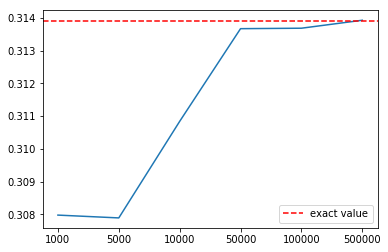

In [30]:
plt.figure()
plt.plot(S1_cache[:, 0])
plt.axhline(y = 0.3139, c = 'r', linestyle = '--', label = 'exact value')
plt.legend(loc = 'best')
plt.xticks(np.arange(len(N_samples)), N_samples)
plt.show()

Here are the exact values for first order and total effect sensitivity indices for reference.

***Ishigami Homma Function***

![](https://raw.githubusercontent.com/Xifus/SA-lab/master/ishigami_sobol.PNG)


***V-Fnction (Sobol g-Function)***

![](https://raw.githubusercontent.com/Xifus/SA-lab/master/gsobol_sobol.PNG)